In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt
import sympy as sp
from sympy import symbols
import time
import pandas as pd

In [2]:
#part 1

def taylor_approx(func, start, end, degree, fixed_c, num_points=100):


    x=symbols('x')

    xvals = np.linspace(start,end,num_points)
    
    coeffs = []

    for n in range(degree+1):
        fn = sp.diff(func, x, n)    # nth derivative
        fn_at_c = fn.subs(x,fixed_c) # plug in x = fixed_c
        fn_at_c = float(fn_at_c)     # convert to float
        factorial_n = float(sp.factorial(n))
        an = fn_at_c / factorial_n    #compute coefficient
        coeffs.append(an)

    #start with all zeros for output array
    output_approx = np.zeros(xvals.shape, dtype=float)
    
    for n in range(len(coeffs)):
        an=coeffs[n]
        term=an*(xvals - fixed_c)**n
        output_approx = output_approx + term

    return xvals, output_approx

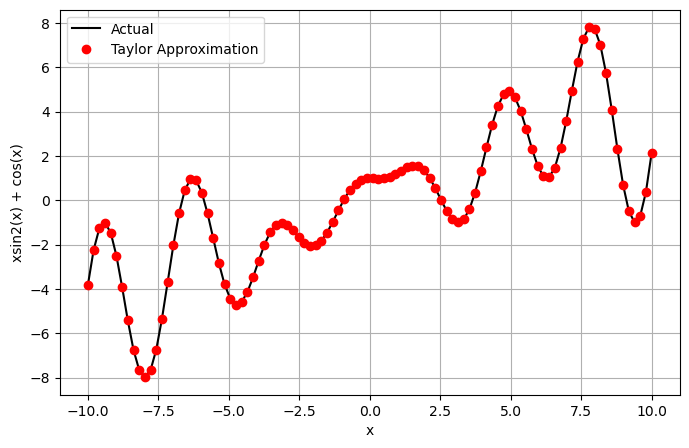

In [3]:
# part 2
x = sp.symbols('x')  # define symbol x to represent variable x
f = x * sp.sin(x)**2 + sp.cos(x)   # f(x) = x sin^2(x) + cos(x)
xpoints, y_hat = taylor_approx(f, start=-10.0, end=10.0, degree=99, fixed_c=0.0)  # call the function to store xpoints and y_hat

y_true = []  # empty list to store true values of the function f
for val in xpoints:
    y_val = f.subs(x, val)   # plug x = val into the function
    y_val = float(y_val)          # convert from sympy number to float
    y_true.append(y_val)

y_true = np.array(y_true)

# plot

plt.figure(figsize=(8,5))

plt.plot(xpoints, y_true, color='black', label="Actual")

plt.plot(xpoints, y_hat, 'ro', label="Taylor Approximation")

plt.xlabel("x")
plt.ylabel("xsin2(x) + cos(x)")
plt.legend()
plt.grid(True)
plt.show()


In [10]:
# part 3
# run taylor approximation for multiple cutoff values
def taylor_steps(function, start, end, fixed_c,
                 initial_degree, final_degree, degree_step, num_points=100):
    # create evenly spaced x values between start and end
    x= symbols('x')
    xpoints = np.linspace(start,end,num_points)

    # list of true values, similar to function in part 2
    y_true_list = []
    for val in xpoints:
        y_val = function.subs(x,val)  #plug values into the function
        y_val = float(y_val)          #convert to float
        y_true_list.append(y_val)
    y_true = np.array(y_true_list)   # convert to numpy array

    # empty list to keep results for each step
    rows = []

    # create a loop that starts at initial degree and goes for each step until the final degree

    for m in range(initial_degree, final_degree + 1, degree_step):
        # time how long it takes to compute approximation
        t0 = time.time()
        xvalues, y_hat = taylor_approx(function, start, end, m, fixed_c, num_points=num_points)
        t1 = time.time()
        time_result = t1-t0

        sum_of_errors = 0.0
        for i in range(len(xvalues)):
            diff = abs(y_true[i] - y_hat[i])
            sum_of_errors += diff

        # append a row for each degree
        rows.append({
            'degree': m,
            'sum_of_errors': sum_of_errors,
            'time_result': time_result
        })
    df = pd.DataFrame(rows, columns=['degree', 'sum_of_errors', 'time_result'])
    return df
        

In [11]:
#part 3 continued

x = symbols('x')
f = x * sp.sin(x)**2 + sp.cos(x)

df = taylor_steps(
    function=f,
    start = -10.0,
    end = 10.0,
    fixed_c = 0.0,
    initial_degree=50,
    final_degree=100,
    degree_step=10,
    num_points=100
)

print(df)

   degree  sum_of_errors  time_result
0      50   4.949573e+01     0.092565
1      60   1.753983e-03     0.097517
2      70   2.848116e-07     0.119579
3      80   2.730240e-07     0.124319
4      90   2.730240e-07     0.138404
5     100   2.730240e-07     0.163249


In [9]:
  # pandas dataframe to csv
#df.to_csv('taylor_values.csv', index=False)